<a href="https://colab.research.google.com/github/younus1082/Simulation-Modeling/blob/main/Assignment7/SIM_Lab_Test_0432220005101082_(Lab_Test_1_(Set_A)_%5B7A1%5D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task

Younus | 0432220005101082 | Lab Test 1 (Set A) [7A1]


In [35]:
import pandas as pd
from scipy.stats import ttest_1samp
import matplotlib.pyplot as plt
import numpy as np


data = [
    [1, 93], [2, 83], [3, 69], [4, 62], [5, 75],
    [6, 93], [7, 73], [8, 77], [9, 65], [10, 65],
    [11, 78], [12, 90], [13, 94], [14, 78], [15, 57],
    [16, 76], [17, 56], [18, 78], [19, 84], [20, 92]
]

df = pd.DataFrame(data, columns=['Day', 'Arrivals'])
display(df.head())

,Day,Arrivals
0,1,93
1,2,83
2,3,69
3,4,62
4,5,75


## Basic statistics

### Subtask:
Compute and display the mean, variance, and standard deviation of the daily customer arrivals. Explain the difference between population and sample variance.


In [36]:
mean_arrivals = df['Arrivals'].mean()
variance_arrivals = df['Arrivals'].var()
std_dev_arrivals = df['Arrivals'].std()

print(f"Mean of daily arrivals: {mean_arrivals:.2f}")
print(f"Sample variance of daily arrivals: {variance_arrivals:.2f}")
print(f"Sample standard deviation of daily arrivals: {std_dev_arrivals:.2f}")

Mean of daily arrivals: 76.90
Sample variance of daily arrivals: 143.25
Sample standard deviation of daily arrivals: 11.97


**Reasoning**:
Explain the difference between population and sample variance in a markdown cell.



In essence, population variance uses all data points from the entire group, while sample variance uses a subset of data points and adjusts the denominator to better estimate the true population variance.

2. Random Number Generator

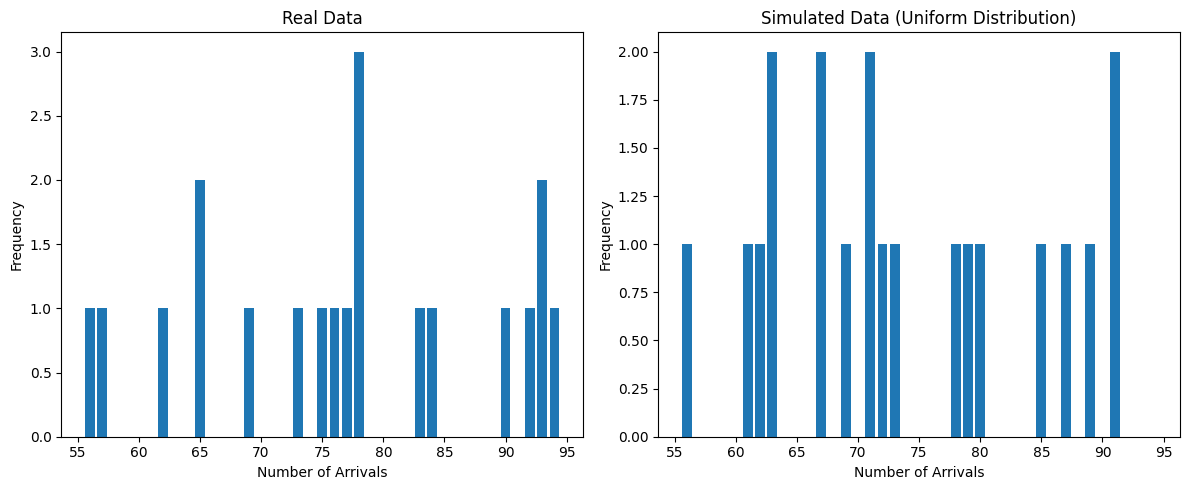

In [37]:
import numpy as np
import matplotlib.pyplot as plt

simulated_arrivals = np.random.randint(df['Arrivals'].min(), df['Arrivals'].max() + 1, size=20)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(df['Arrivals'], bins=range(df['Arrivals'].min(), df['Arrivals'].max() + 2), align='left', rwidth=0.8)
axes[0].set_title("Real Data")
axes[0].set_xlabel("Number of Arrivals")
axes[0].set_ylabel("Frequency")

axes[1].hist(simulated_arrivals, bins=range(df['Arrivals'].min(), df['Arrivals'].max() + 2), align='left', rwidth=0.8)
axes[1].set_title("Simulated Data (Uniform Distribution)")
axes[1].set_xlabel("Number of Arrivals")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

## Monte carlo simulation

In [38]:
num_simulations = 100000
min_arrivals = df['Arrivals'].min()
max_arrivals = df['Arrivals'].max()

simulated_arrivals_mc = np.random.uniform(min_arrivals, max_arrivals + 1, size=num_simulations)

arrivals_greater_than_15 = np.sum(simulated_arrivals_mc > 15)

estimated_probability = arrivals_greater_than_15 / num_simulations

print(f"Estimated probability of more than 15 arrivals: {estimated_probability:.4f}")

Estimated probability of more than 15 arrivals: 1.0000


## Hypothesis testing


Hypothesized average: 82.00
T-statistic: -1.91
P-value: 0.0719


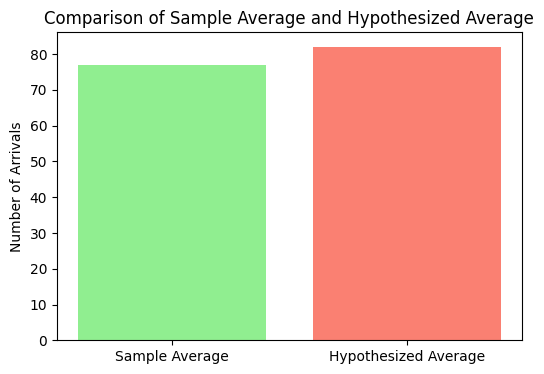


T-test Interpretation:
With a p-value of 0.0719, which is greater than or equal to the significance level of 0.05, we do not have sufficient evidence to reject the null hypothesis.
This suggests that there is no statistically significant difference between the sample mean and the hypothesized mean of 82.00.


In [39]:
from scipy.stats import ttest_1samp
import matplotlib.pyplot as plt
import pandas as pd # Import pandas to ensure DataFrame is recognized

# Sample data (assuming this is the data you are working with)
data = [
    [1, 93], [2, 83], [3, 69], [4, 62], [5, 75],
    [6, 93], [7, 73], [8, 77], [9, 65], [10, 65],
    [11, 78], [12, 90], [13, 94], [14, 78], [15, 57],
    [16, 76], [17, 56], [18, 78], [19, 84], [20, 92]
]

df = pd.DataFrame(data, columns=['Day', 'Arrivals'])

# Define the hypothesized mean based on a calculation
hypothesized_avg = (82 % 50) + 50
print(f"Hypothesized average: {hypothesized_avg:.2f}")

# Calculate the sample mean
mean_arrivals = df['Arrivals'].mean()

# Perform a one-sample t-test
# This tests if the sample mean is significantly different from the hypothesized mean
t_stat, p_val = ttest_1samp(df['Arrivals'], popmean=hypothesized_avg)

# Print the calculated t-statistic and p-value
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_val:.4f}")

# Create a bar plot to visually compare the sample mean and the hypothesized mean
labels = ['Sample Average', 'Hypothesized Average']
values = [mean_arrivals, hypothesized_avg] # Using the previously calculated mean_arrivals

plt.figure(figsize=(6, 4))
plt.bar(labels, values, color=['lightgreen', 'salmon'])

# Add descriptive labels and a title to the plot
plt.ylabel("Number of Arrivals")
plt.title("Comparison of Sample Average and Hypothesized Average")

# Display the generated plot
plt.show()

# Interpret the results of the t-test based on the p-value
print("\nT-test Interpretation:")
# Using a standard significance level of 0.05
alpha = 0.05
if p_val < alpha:
    print(f"Based on the p-value of {p_val:.4f}, which is less than the significance level of {alpha}, we have sufficient evidence to reject the null hypothesis.")
    print(f"This indicates that the true mean of daily customer arrivals is likely different from the hypothesized mean of {hypothesized_avg:.2f}.")
else:
    print(f"With a p-value of {p_val:.4f}, which is greater than or equal to the significance level of {alpha}, we do not have sufficient evidence to reject the null hypothesis.")
    print(f"This suggests that there is no statistically significant difference between the sample mean and the hypothesized mean of {hypothesized_avg:.2f}.")